# ALIKA RIZVI

# GRIP

Prediction using Decision Tree

Algorithm

TASK_6:Create the decision tree classifier and visualize it graphically and the purpose is if we feed any new data to this classifier it would be able to predict the right class accordingly

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df=pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 6)

In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

BOX PLOT:so box plot is use to identify outliers

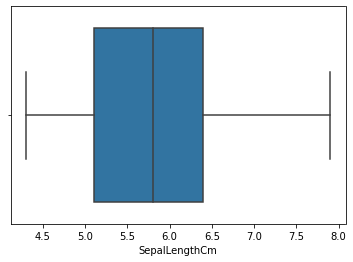

In [6]:
sns.boxplot(x=df['SepalLengthCm'])

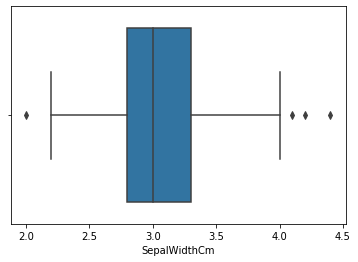

In [7]:
sns.boxplot(x=df['SepalWidthCm'])

so here in this box plot we can observe some outliers as it is clear from the above box plot that we have three points more than upper quartile and one points which is less than lower quartile

In [8]:
for column in df.columns[1:-1]:#here i am dropping all the outliers from the dataset to give better prediction using decision tree algorithm
    for specy in df["Species"].unique():
        Specy_type=df[df["Species"]==specy]
        Selected_column=Specy_type[column]
        avg = Selected_column.mean()
        std = Selected_column.std()
        upper_lmt = avg + (3 * std) 
        lower_lmt= avg - (3 * std)
        outliers=Selected_column[((Selected_column > upper_lmt) | (Selected_column< lower_lmt))].index # picking outliers' indeces
        df.drop(index=outliers, inplace=True) # dropping outliers
        print(column,specy,outliers)    

SepalLengthCm Iris-setosa Int64Index([], dtype='int64')
SepalLengthCm Iris-versicolor Int64Index([], dtype='int64')
SepalLengthCm Iris-virginica Int64Index([], dtype='int64')
SepalWidthCm Iris-setosa Int64Index([], dtype='int64')
SepalWidthCm Iris-versicolor Int64Index([], dtype='int64')
SepalWidthCm Iris-virginica Int64Index([], dtype='int64')
PetalLengthCm Iris-setosa Int64Index([], dtype='int64')
PetalLengthCm Iris-versicolor Int64Index([], dtype='int64')
PetalLengthCm Iris-virginica Int64Index([], dtype='int64')
PetalWidthCm Iris-setosa Int64Index([43], dtype='int64')
PetalWidthCm Iris-versicolor Int64Index([], dtype='int64')
PetalWidthCm Iris-virginica Int64Index([], dtype='int64')


In [22]:
for column in df.columns[1:-1]:
    for specy in df["Species"].unique():
        Specy_type = df[df["Species"] == specy]
        Selected_column = Specy_type[column]
        q1 = Selected_column.quantile(0.25) # for select first quartile
        q3 = Selected_column.quantile(0.75) # for select third quartile
        iqr = q3 - q1 # this is interquartile range
        upper_limit = q3 + 1.5 * iqr
        lower_limit = q1 - 1.5 * iqr        
        outlierss = Selected_column[(Selected_column > upper_limit) | (Selected_column < lower_limit)].index # picking outliers' indeces
        print(outlierss)
        df.drop(index = outlierss, inplace=True) # dropping outliers
        
        
        


Int64Index([15], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([131], dtype='int64')
Int64Index([33, 41], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([117, 119], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([118], dtype='int64')
Int64Index([6, 9, 12, 16, 17, 19, 21, 26, 31, 32, 34, 37, 40, 45], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')


so again i am analysing the shape of the data which is showing  reduction in number of rows. that has happend beacuse i have removed all the rows conataining outliers

In [10]:
df.shape

(137, 6)

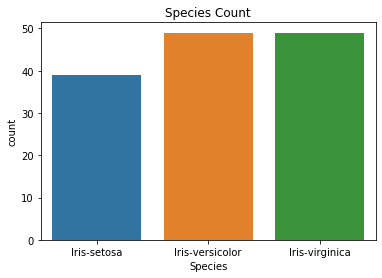

In [11]:
plt.title('Species Count')#plotting the countplot to count the number species present in each class
sns.countplot(df['Species']);


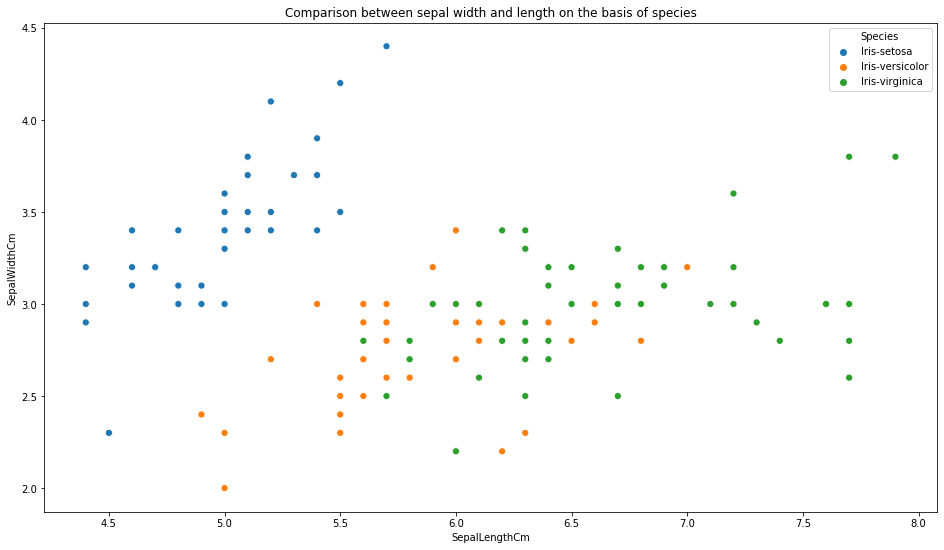

In [12]:
plt.figure(figsize=(16,9))
plt.title('Comparison between sepal width and length on the basis of species')
sns.scatterplot(df['SepalLengthCm'], df['SepalWidthCm'], hue = df['Species'], s= 50);

From the above visualization, we can tell that the iris-setosa species has smaller sepal length but higher width. While we see Versicolor lies in almost middle for length as well as width. While Virginica has larger sepal lengths and smaller sepal widths.


In [13]:
x= df.iloc[:,[1,2,3,4]].values  
y= df.iloc[:, 5].values  

In [14]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  
  

In [15]:
 from sklearn.tree import DecisionTreeClassifier

In [16]:
#Fitting Decision Tree classifier to the training set  
 
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(x_train, y_train)  

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In the above code, we have created a classifier object, in which we have passed two main parameters;

"criterion='entropy': Criterion is used to measure the quality of split, which is calculated by information gain given by entropy.
random_state=0": For generating the random states.

In [17]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

so if we want to know the number of correct and incorrect predictions, we need to use the confusion matrix. Below is the code for it:

In [18]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  

In [19]:
cm


array([[12,  0,  0],
       [ 0, 12,  1],
       [ 0,  1,  9]], dtype=int64)

One can now feed any new data to this classifer and it would be able to predict the right class accordingly.¶

In [ ]:
THANKYOU

# 

TASK 6 IS COMPLETED